<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))
dfCovidtracking.set_index(['date'], inplace=True)


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/06-12-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11],
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [115]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-14:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-30,1768664,98272,24203,937
2020-05-31,1790749,98927,22085,655
2020-06-01,1806943,99405,16194,478
2020-06-02,1830544,100562,23601,1157
2020-06-03,1850582,101531,20038,969
2020-06-04,1871150,102407,20568,876
2020-06-05,1894449,103255,23299,848
2020-06-06,1917160,103972,22711,717
2020-06-07,1936717,104432,19557,460


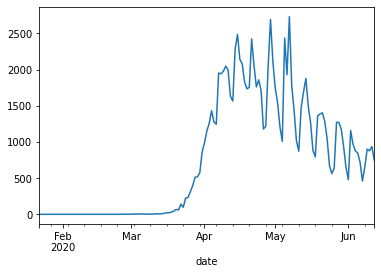

In [119]:
dfCovidtracking.groupby(by='date').sum().deathIncrease.plot.line()

In [7]:
dfCovidtracking.loc[dfCovidtracking.state=='CA'].groupby(by='date').sum()[['positive', 'death', 'positiveIncrease', 'deathIncrease']].tail()

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-06-08,131319,4653,2507,27
2020-06-09,133489,4697,2170,44
2020-06-10,136191,4776,2702,79
2020-06-11,139281,4881,3090,105
2020-06-12,141983,4943,2702,62


In [8]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.index.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 2037530
Total deaths = 108554


,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,381714,2419686,0,1898.0,89995.0,552.0,0.0,387.0,0.0,68399.0,A,6/12/2020 00:00,2020-06-12T00:00:00Z,06/11 20:00,24495,89995.0,2020-06-12T00:00:00Z,0.0,0.0,0.0,381714.0,36,822,71573,2801400,2801400,72395,2801400,53,0,b163ad0441c8a10074455029c10906cb5b434043,0,0,0,0,0,
NJ,166164,889232,0,1480.0,18607.0,415.0,0.0,300.0,0.0,28509.0,A+,6/12/2020 13:00,2020-06-12T13:00:00Z,06/12 09:00,12489,18607.0,2020-06-12T13:00:00Z,0.0,0.0,0.0,166164.0,34,348,24255,1055396,1055396,24603,1055396,46,115,25dbd98be0d290dc1bcf391c46e8528ae67a0868,0,0,0,0,0,
CA,141983,2520275,0,4480.0,0.0,1310.0,0.0,0.0,0.0,0.0,B,6/12/2020 00:00,2020-06-12T00:00:00Z,06/11 20:00,4943,0.0,2020-06-12T00:00:00Z,2662258.0,0.0,0.0,141983.0,06,2702,61909,2662258,2662258,64611,2662258,62,0,da15f0aa6a0118c48a65d740689db764ca4f1811,0,0,0,0,0,
IL,132059,1015903,0,2209.0,0.0,648.0,0.0,375.0,0.0,0.0,A,6/12/2020 00:00,2020-06-12T00:00:00Z,06/11 20:00,6441,0.0,2020-06-12T00:00:00Z,1147101.0,0.0,0.0,131198.0,17,732,24179,1147962,1147962,24911,1147962,78,0,91aecc573cb60def08bb4f7a1fd9d6a2d13836a6,0,0,0,0,0,
MA,105059,588300,0,1143.0,10726.0,276.0,0.0,170.0,0.0,0.0,A+,6/12/2020 10:00,2020-06-12T10:00:00Z,06/12 06:00,7538,10726.0,2020-06-12T10:00:00Z,0.0,0.0,0.0,100811.0,25,392,9879,693359,693359,10271,693359,46,72,025c032ac8e1dc8570101aca0b3b9a8c15b7f303,0,0,0,0,0,


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResultsIncrease', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [10]:
dfUSAPos[-7:]

,date,positive,totalTestResultsIncrease,death,positiveIncrease,deathIncrease,pos_pct
136,2020-06-06,1917160,478436,103972,22711,717,0.940924
137,2020-06-07,1936717,446651,104432,19557,460,0.950522
138,2020-06-08,1953730,402117,105087,17013,655,0.958872
139,2020-06-09,1970765,413766,105989,17035,902,0.967232
140,2020-06-10,1991527,419468,106867,20762,878,0.977422
141,2020-06-11,2013778,446765,107803,22251,936,0.988343
142,2020-06-12,2037530,583961,108554,23752,751,1.000000


In [11]:
dfStatePos[-7:]

,date,positive,totalTestResultsIncrease,death,positiveIncrease,deathIncrease,pos_pct
94,2020-06-06,126016,69837,4559,3115,74,0.887543
95,2020-06-07,128812,53918,4626,2796,67,0.907235
96,2020-06-08,131319,68972,4653,2507,27,0.924892
97,2020-06-09,133489,55055,4697,2170,44,0.940176
98,2020-06-10,136191,54553,4776,2702,79,0.959206
99,2020-06-11,139281,56849,4881,3090,105,0.980970
100,2020-06-12,141983,64611,4943,2702,62,1.000000


In [12]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-08,1953730,18699572,1606,29969.0,217581.0,6394.0,9013.0,3240.0,762.0,518522.0,105087,217581.0,11810000.0,269599.0,3380266.0,1814333.0,17013,385104,20654908,20653302,402117,20653302,655,675,0,0,0,0,0
2020-06-09,1970765,19096303,1661,30547.0,219089.0,6450.0,9141.0,3090.0,771.0,524855.0,105989,219089.0,12040910.0,272852.0,3448405.0,1836300.0,17035,396731,21068729,21067068,413766,21067068,902,1508,0,0,0,0,0
2020-06-10,1991527,19495009,1737,30203.0,220602.0,6242.0,9225.0,3020.0,780.0,533504.0,106867,220602.0,11244005.0,276235.0,3496690.0,1852393.0,20762,398706,21488273,21486536,419468,21486536,878,1513,0,0,0,0,0
2020-06-11,2013778,19919523,1816,29064.0,221983.0,6067.0,9295.0,2886.0,792.0,540292.0,107803,221983.0,11385094.0,278760.0,3540246.0,1900910.0,22251,424514,21935117,21933301,446765,21933301,936,1381,0,0,0,0,0
2020-06-12,2037530,20479732,1783,28524.0,223281.0,6012.0,9373.0,2734.0,814.0,547386.0,108554,223281.0,12263513.0,316795.0,4169383.0,1920996.0,23752,560209,22519045,22517262,583961,22517262,751,1298,0,0,0,0,0


In [13]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-08,131319,2299871,0,4506.0,0.0,1301.0,0.0,0.0,0.0,0.0,4653,0.0,2431190.0,0.0,0.0,131319.0,2507,66465,2431190,2431190,68972,2431190,27,0,0,0,0,0,0
2020-06-09,133489,2352756,0,4583.0,0.0,1345.0,0.0,0.0,0.0,0.0,4697,0.0,2486245.0,0.0,0.0,133489.0,2170,52885,2486245,2486245,55055,2486245,44,0,0,0,0,0,0
2020-06-10,136191,2404607,0,4719.0,0.0,1326.0,0.0,0.0,0.0,0.0,4776,0.0,2540798.0,0.0,0.0,136191.0,2702,51851,2540798,2540798,54553,2540798,79,0,0,0,0,0,0
2020-06-11,139281,2458366,0,4534.0,0.0,1325.0,0.0,0.0,0.0,0.0,4881,0.0,2597647.0,0.0,0.0,139281.0,3090,53759,2597647,2597647,56849,2597647,105,0,0,0,0,0,0
2020-06-12,141983,2520275,0,4480.0,0.0,1310.0,0.0,0.0,0.0,0.0,4943,0.0,2662258.0,0.0,0.0,141983.0,2702,61909,2662258,2662258,64611,2662258,62,0,0,0,0,0,0


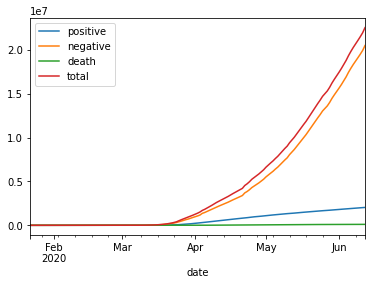

In [14]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

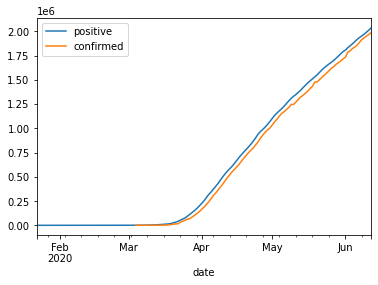

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [113]:
dfData = dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()
print(dfData)
print(f"IFR based on JHU Data: {dfData.dead/dfData.confirmed*100:.2f}%")

confirmed    2048986
dead          114669
dtype: int64
IFR based on JHU Data: 5.60%


In [114]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    146659
dead           4978
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,63,0,0,63,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,529,31,0,498,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,984,13,0,971,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-06-12 05:09:52,43.452658,-116.241552,854,22,0,832,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-06-12 05:09:52,41.330756,-94.471059,10,0,0,10,"Adair, Iowa, US"


In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                2023347
Brazil             802828
Russia             501800
India              297535
United Kingdom     292860
Spain              242707
Italy              236142
Peru               214788
France             192493
Germany            186691
Name: confirmed, dtype: int64

In [21]:
dfctd_state_curr.head()

,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,625,70255,0,15.0,0.0,0.0,0.0,3.0,0.0,403.0,A,6/12/2020 00:00,2020-06-12T00:00:00Z,06/11 20:00,12,0.0,2020-06-12T00:00:00Z,70880.0,0.0,0.0,0.0,02,14,1855,70880,70880,1869,70880,1,0,5f1a4d5e430995ef9030e190ec73783f54ae0d34,0,0,0,0,0,
AL,23710,262675,0,622.0,2202.0,0.0,658.0,0.0,384.0,13508.0,B,6/12/2020 11:00,2020-06-12T11:00:00Z,06/12 07:00,769,2202.0,2020-06-12T11:00:00Z,0.0,0.0,0.0,23333.0,01,865,6694,286385,286385,7559,286385,14,37,dcbcb0ffeb87d85d6579b48479e7c00de3059a96,0,0,0,0,0,
AR,11547,169575,0,203.0,961.0,0.0,0.0,49.0,157.0,7607.0,A,6/12/2020 15:10,2020-06-12T15:10:00Z,06/12 11:10,176,961.0,2020-06-12T15:10:00Z,0.0,0.0,0.0,11547.0,05,731,3726,181122,181122,4457,181122,5,36,4bee2db901732ed74238ccbf11e271ba60bcc9fe,0,0,0,0,0,
AS,0,174,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,6/1/2020 00:00,2020-06-01T00:00:00Z,05/31 20:00,0,0.0,2020-06-01T00:00:00Z,0.0,0.0,0.0,0.0,60,0,0,174,174,0,174,0,0,ba79cae0ba7e6ce817ec720ab5b17bca838471c3,0,0,0,0,0,
AZ,32918,278318,0,1336.0,3622.0,429.0,0.0,278.0,0.0,5980.0,A+,6/12/2020 00:00,2020-06-12T00:00:00Z,06/11 20:00,1144,3622.0,2020-06-12T00:00:00Z,320816.0,0.0,0.0,30955.0,04,1654,0,311236,311236,1654,311236,17,91,7e588d0ceb11906740fae70a21bf967f3b6bed91,0,0,0,0,0,


In [0]:
dfState = dfCovidtracking.reset_index()[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [111]:
dfState.loc['HI'].head(14)


,date,positive,death,total_positive,pct
state,,,,,
HI,2020-06-12,692,17,692,1.000000
HI,2020-06-11,685,17,692,0.989884
HI,2020-06-10,682,17,692,0.985549
HI,2020-06-09,676,17,692,0.976879
HI,2020-06-08,675,17,692,0.975434
HI,2020-06-07,673,17,692,0.972543
HI,2020-06-06,664,17,692,0.959538
HI,2020-06-05,655,17,692,0.946532
HI,2020-06-04,653,17,692,0.943642


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

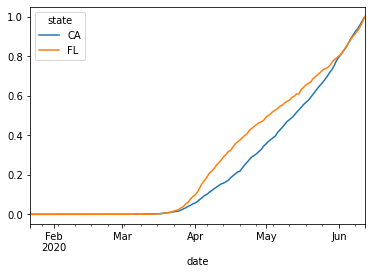

In [26]:
x = res.loc[:, ['CA','FL']].plot.line()

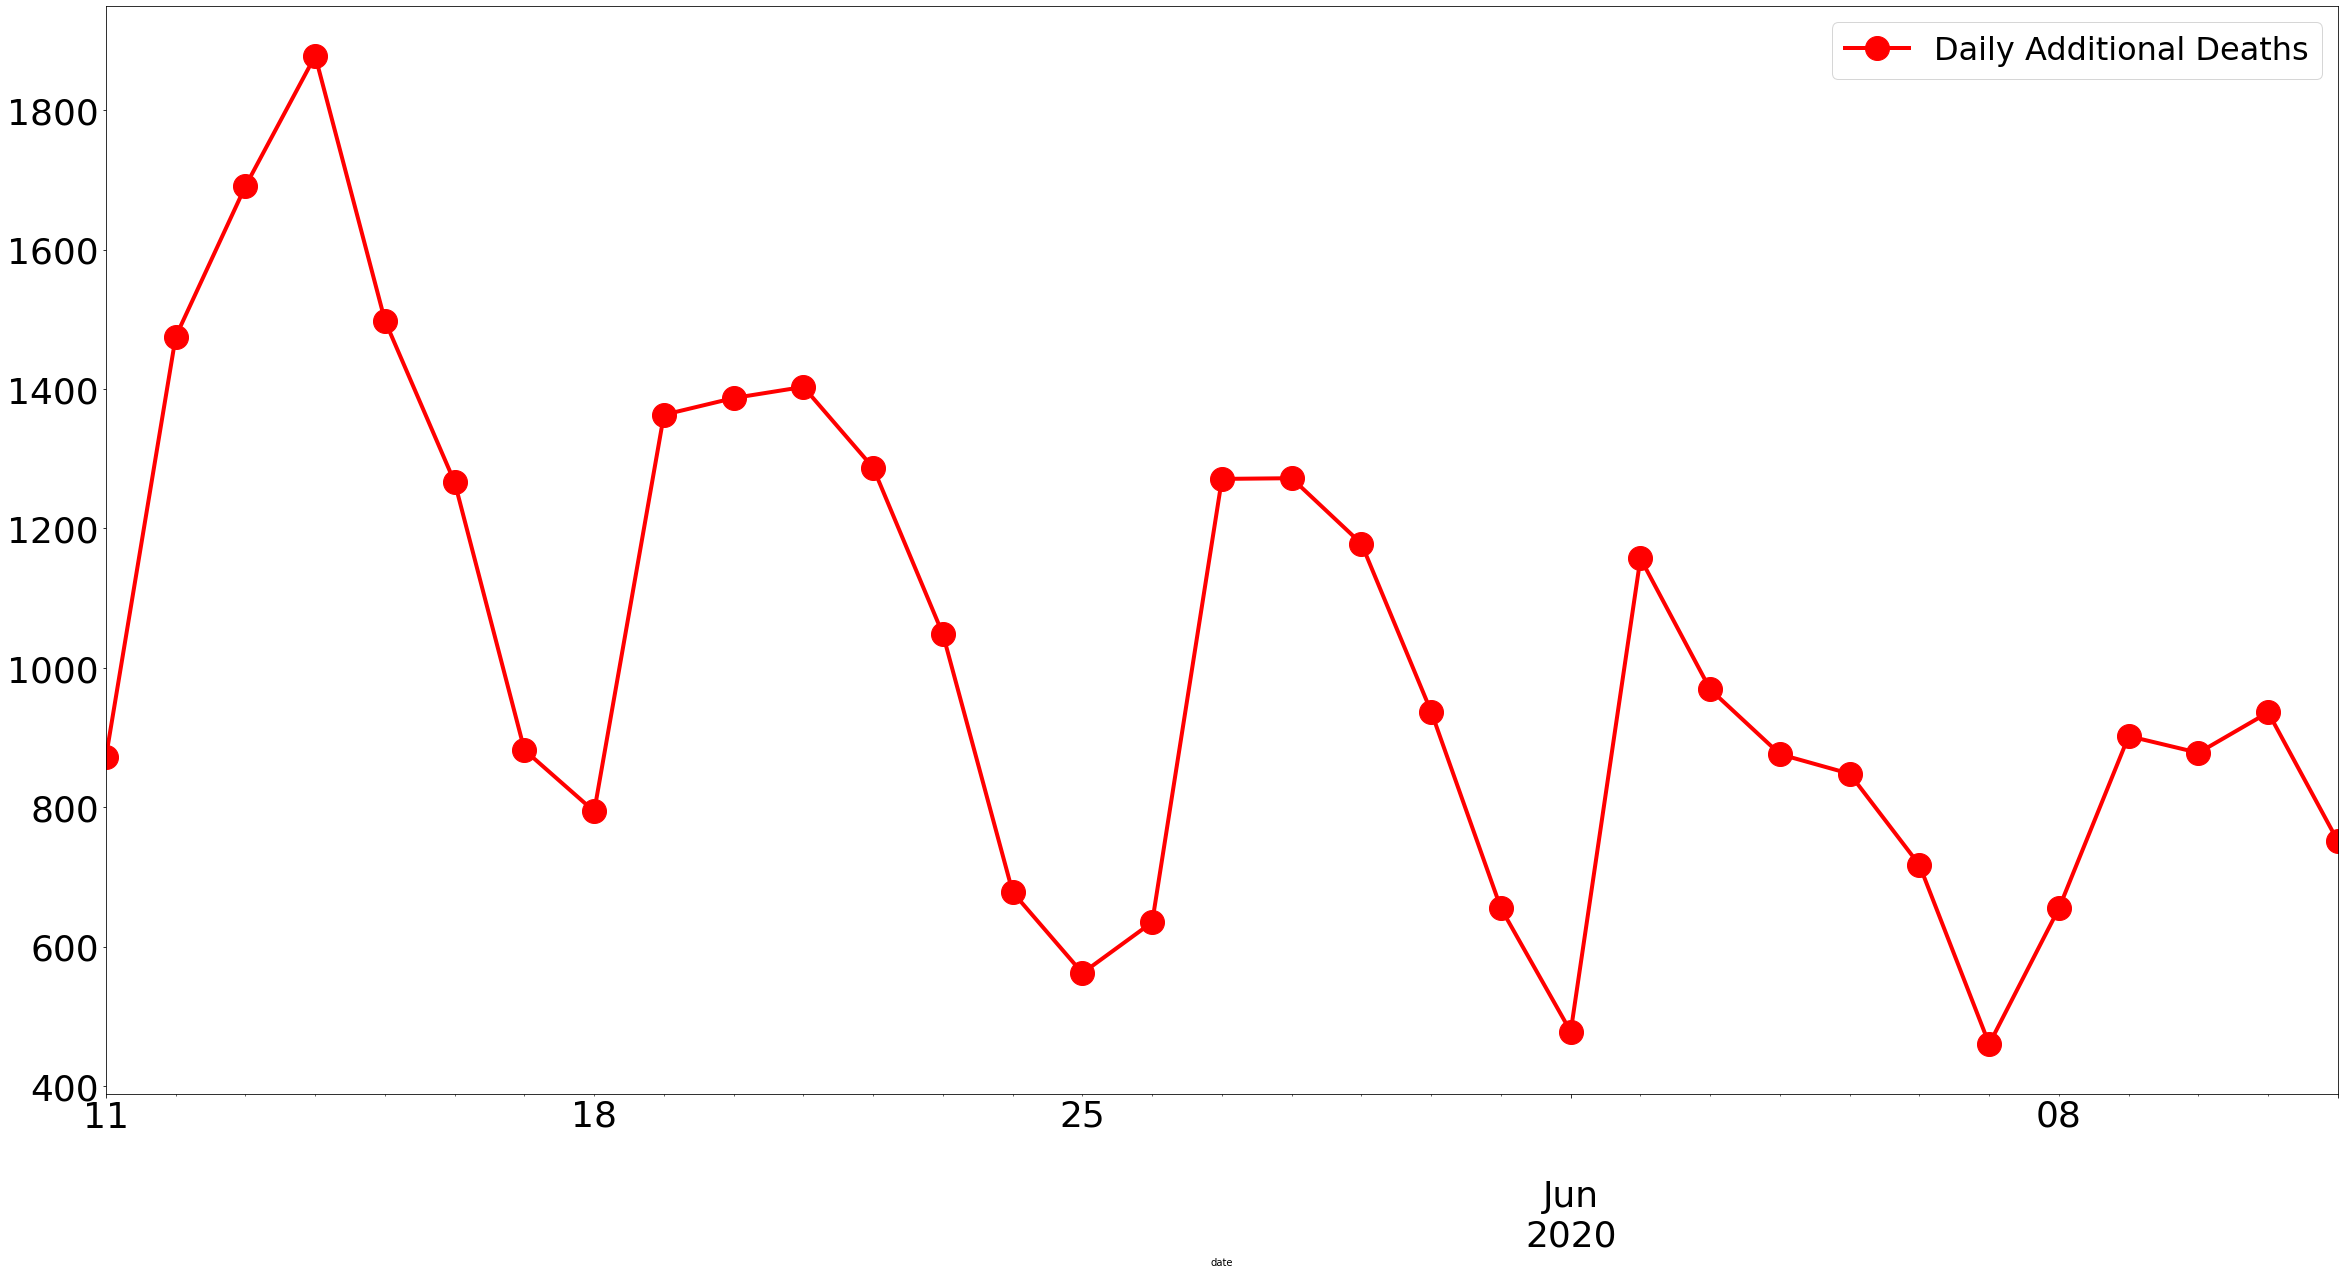

In [27]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


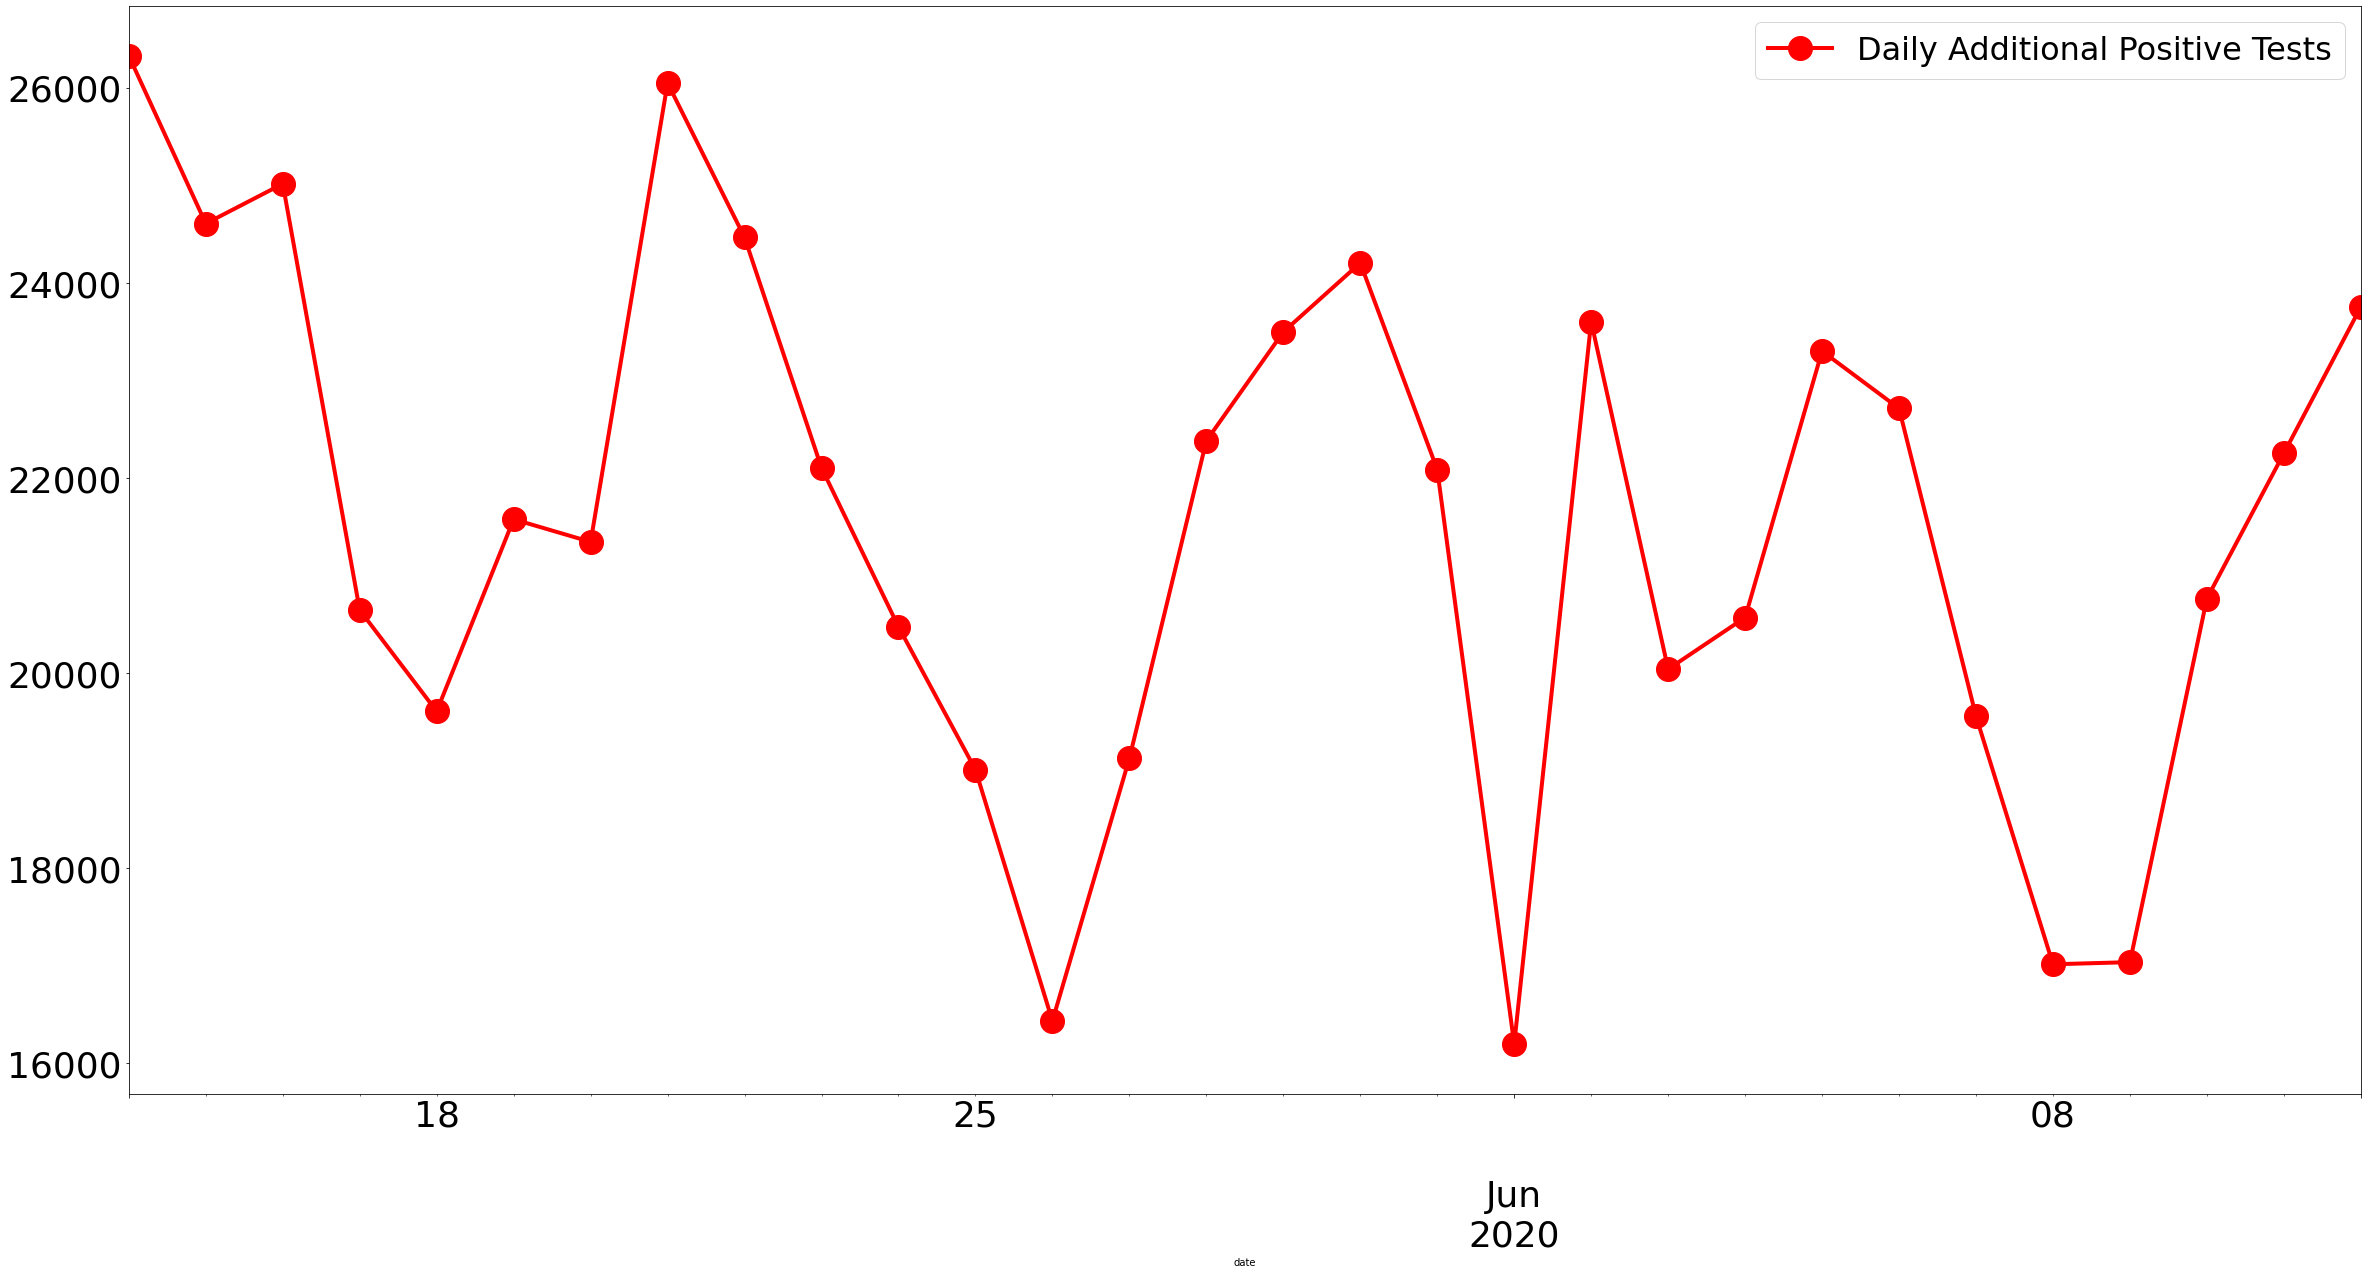

In [28]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


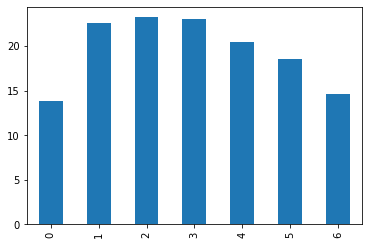

In [31]:
dfDoW.mean().deathIncrease.plot.bar()



In [32]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202018,12575,24581,1470237,191087,1661324
202019,12344,18998,1742137,171552,1913689
202020,9562,12129,2315428,157984,2473412
202021,7960,15648,2618181,155611,2773792
202022,6510,26480,2622280,146726,2769006
202023,5505,6823,3069113,145968,3215081
202024,4122,6375,2165264,100813,2266077


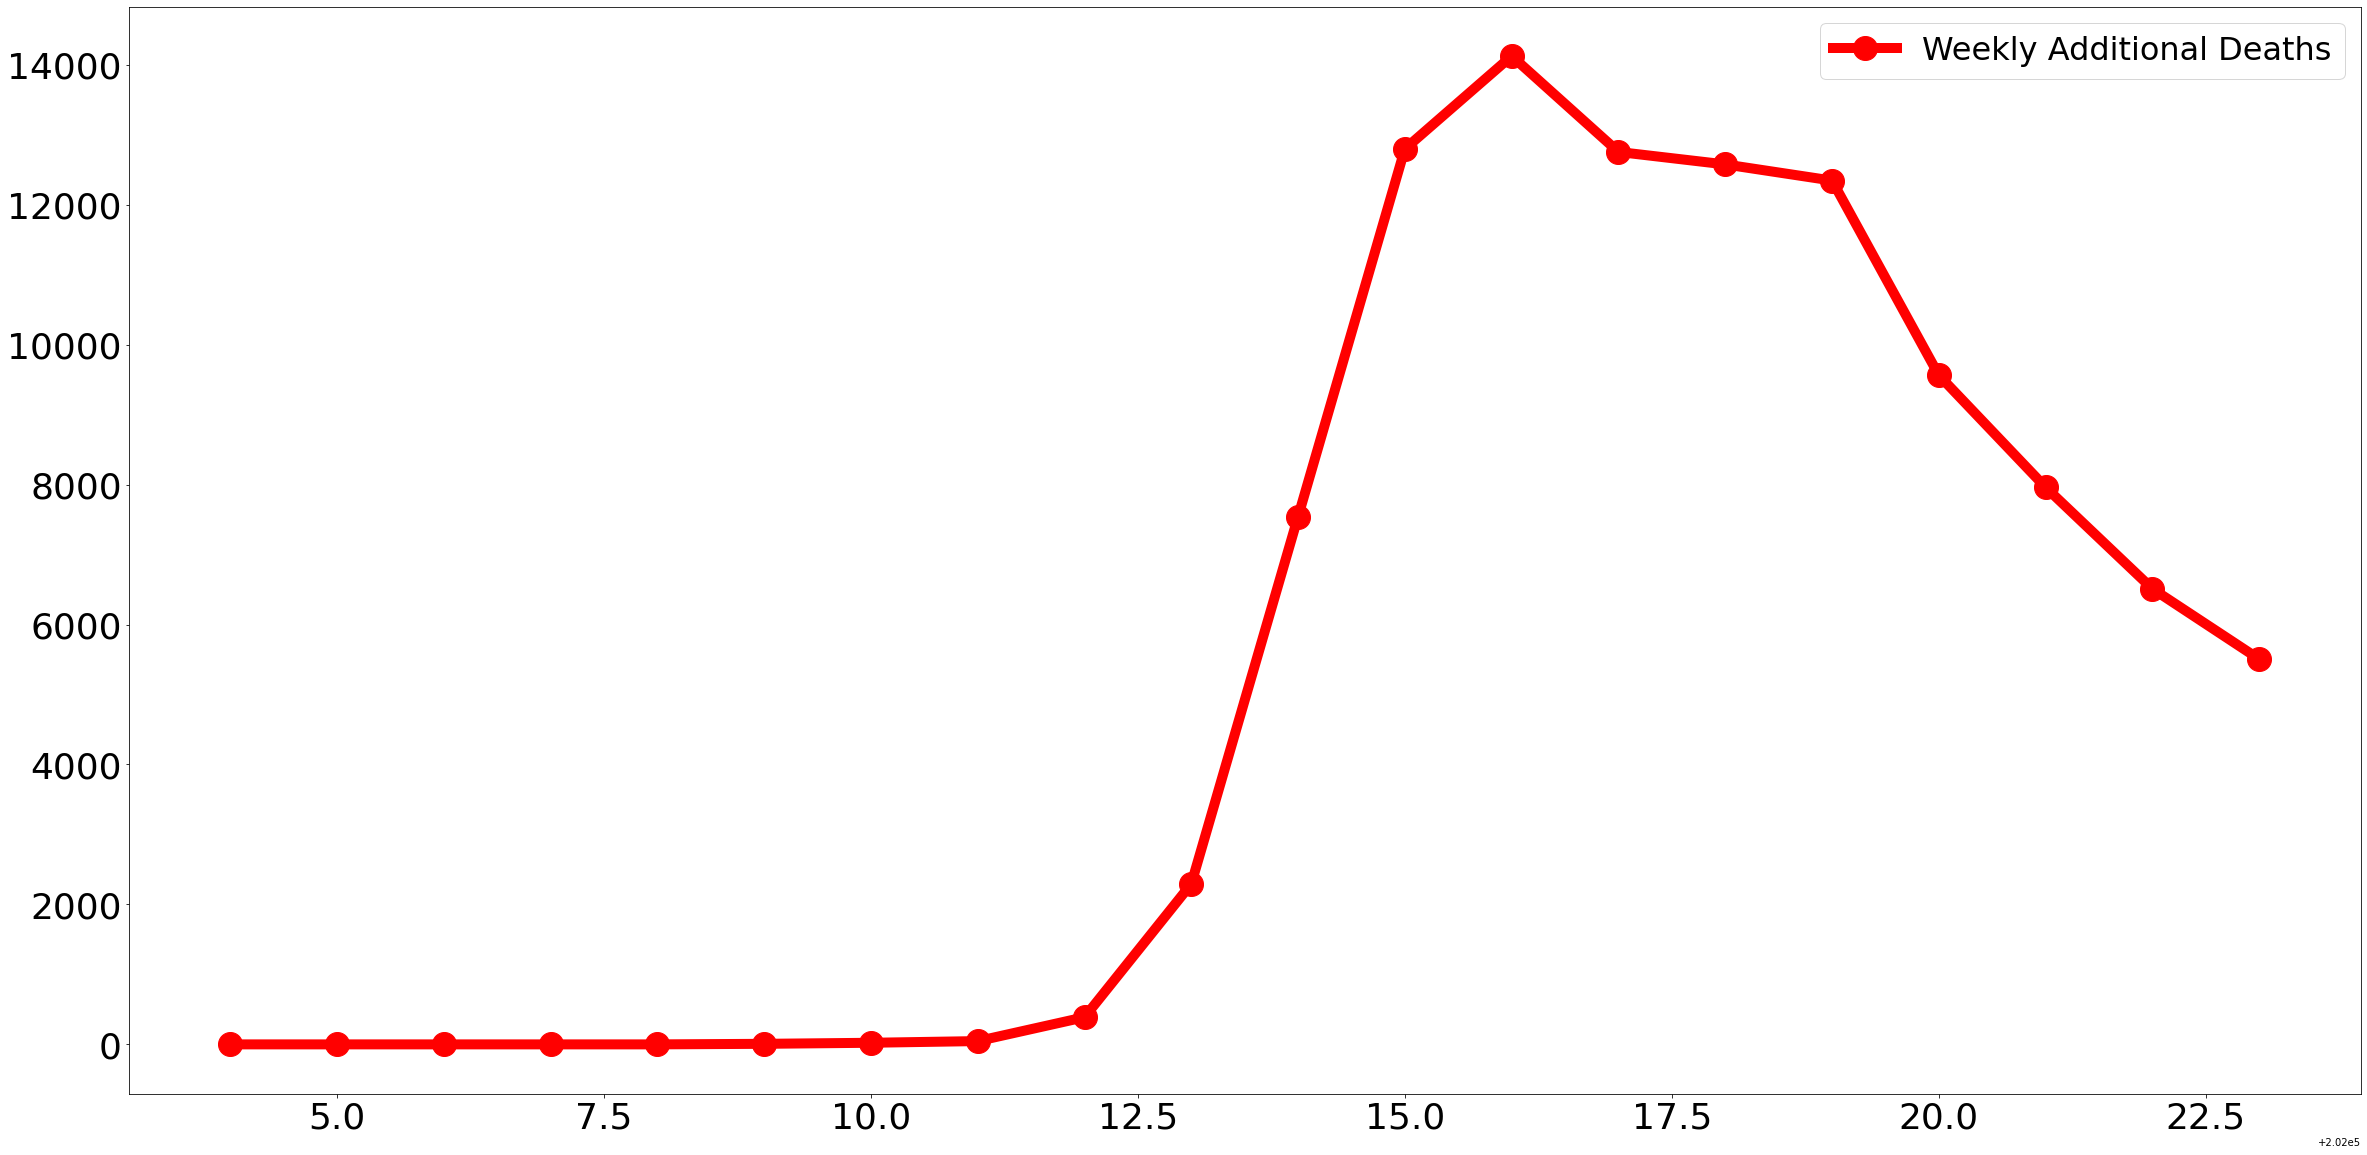

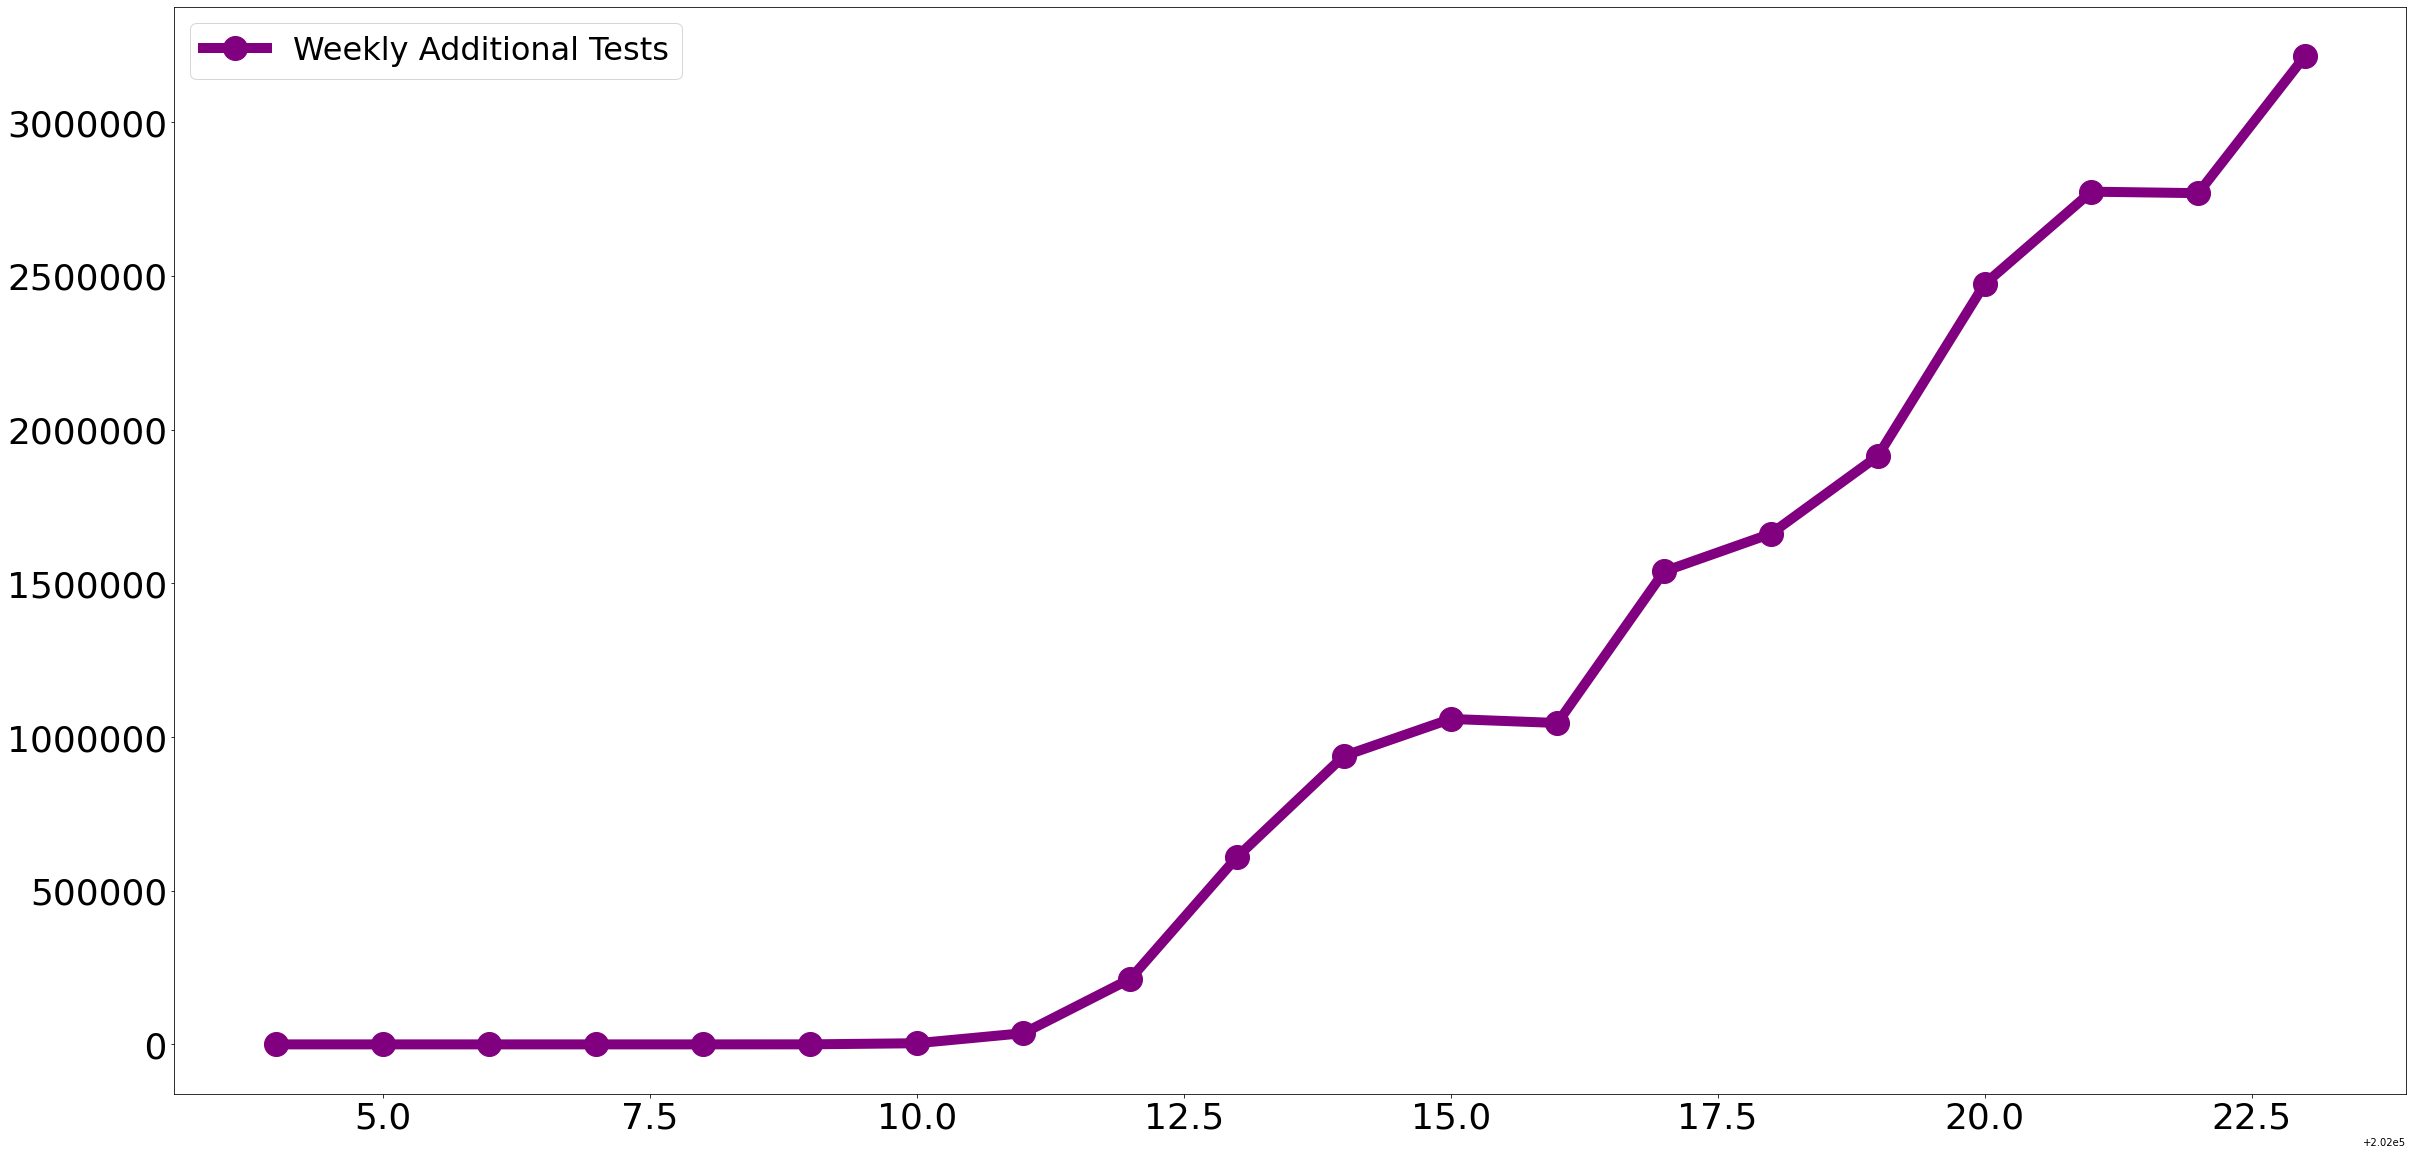

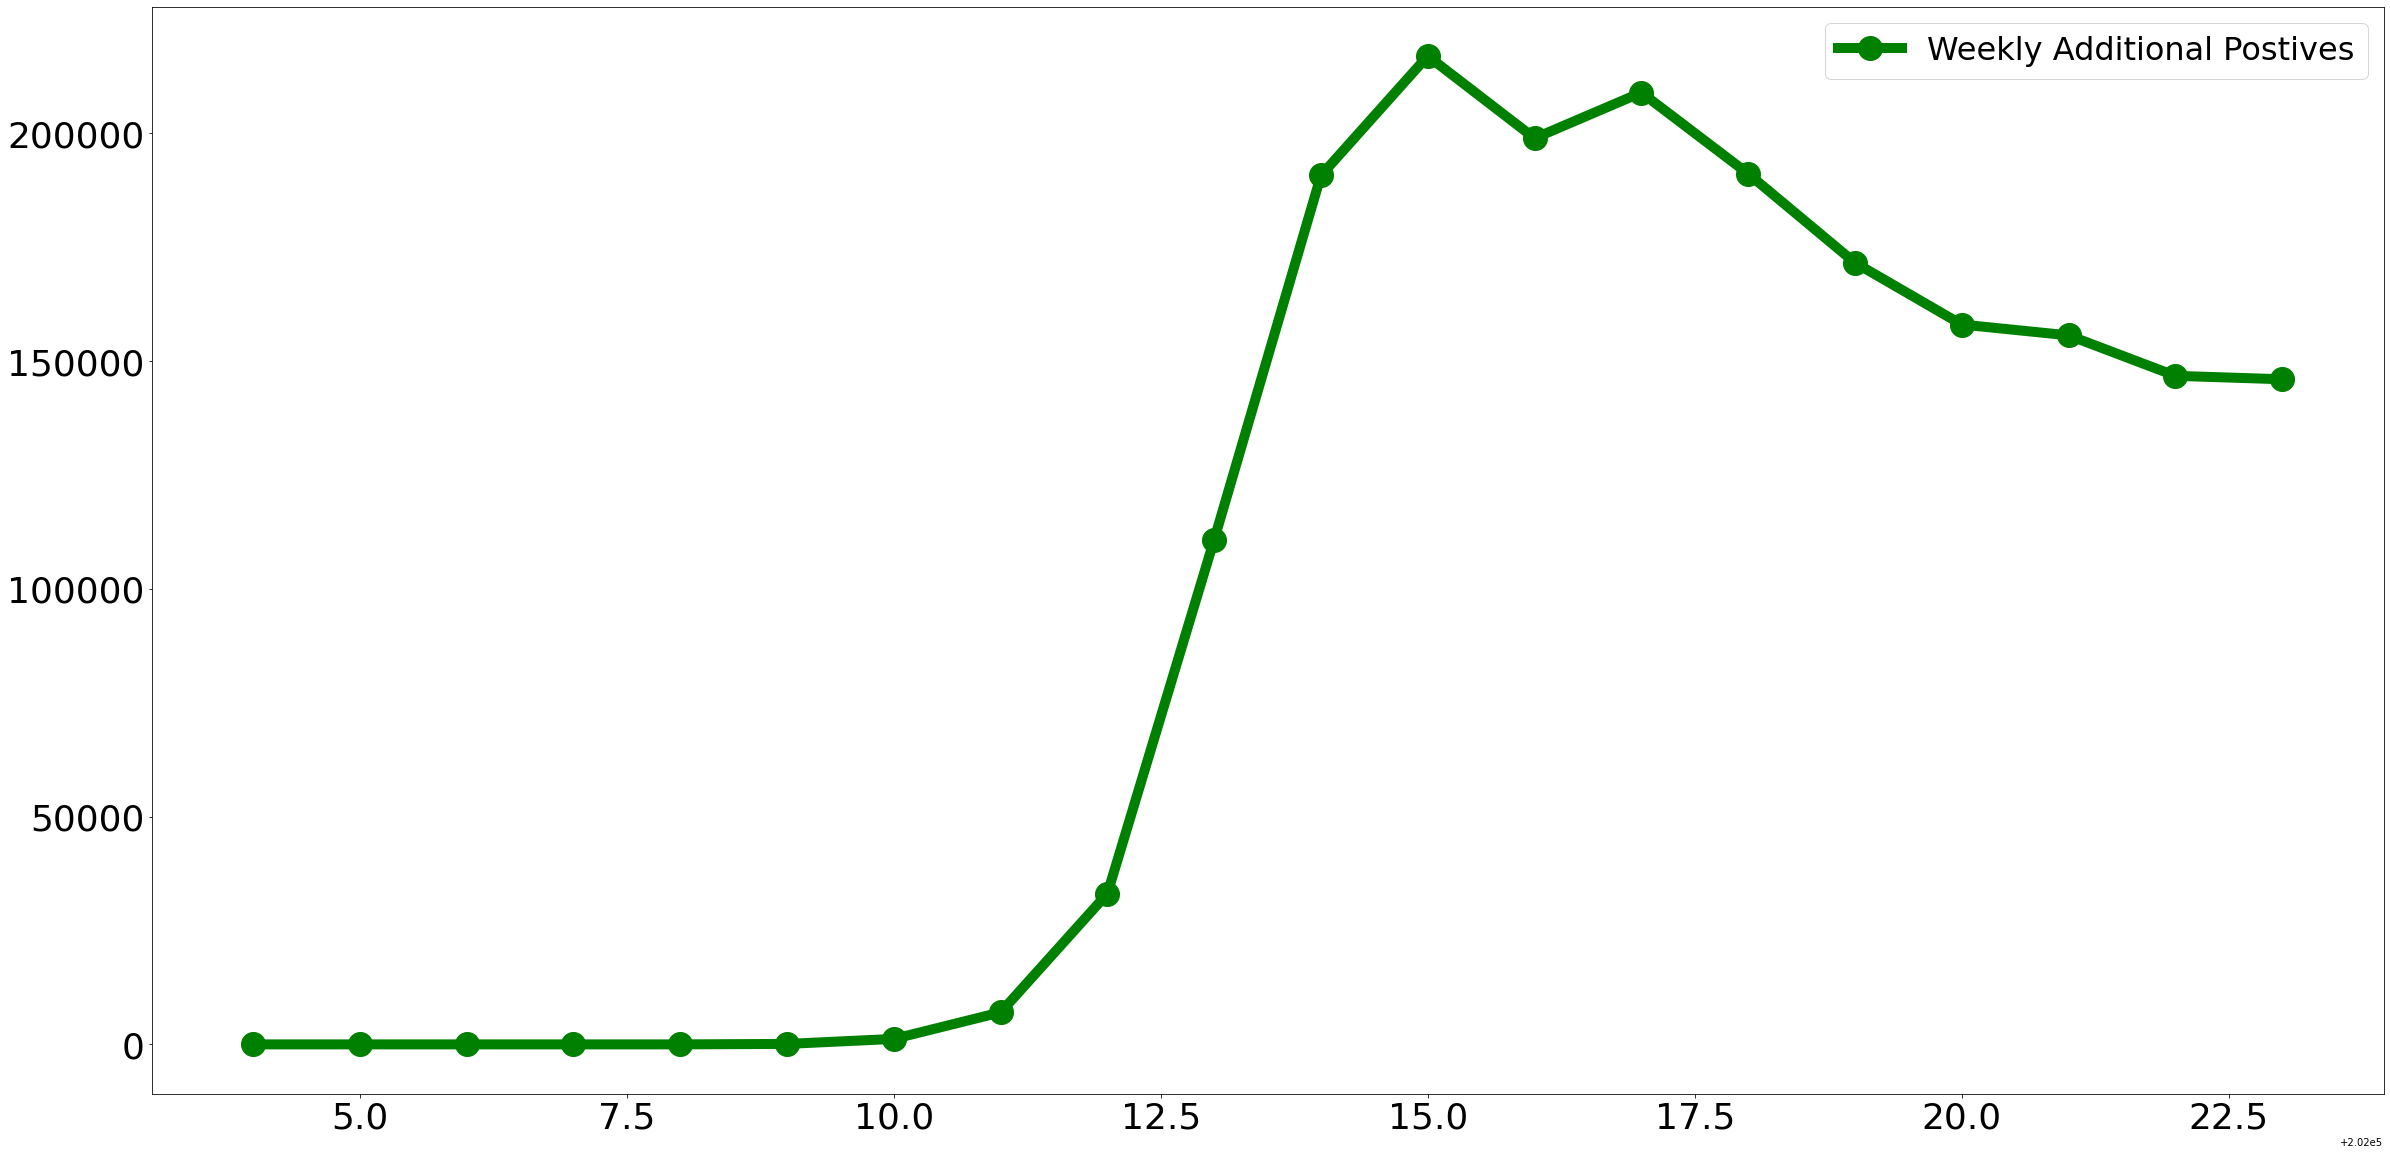

In [33]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

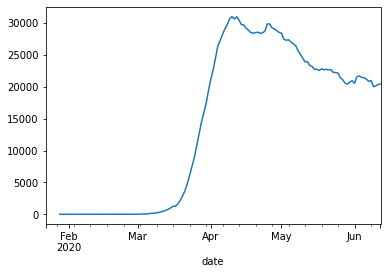

In [34]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

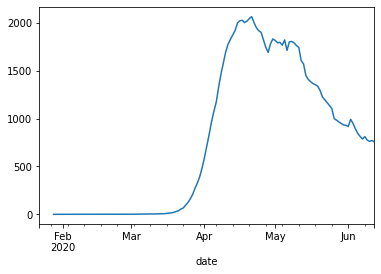

In [35]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

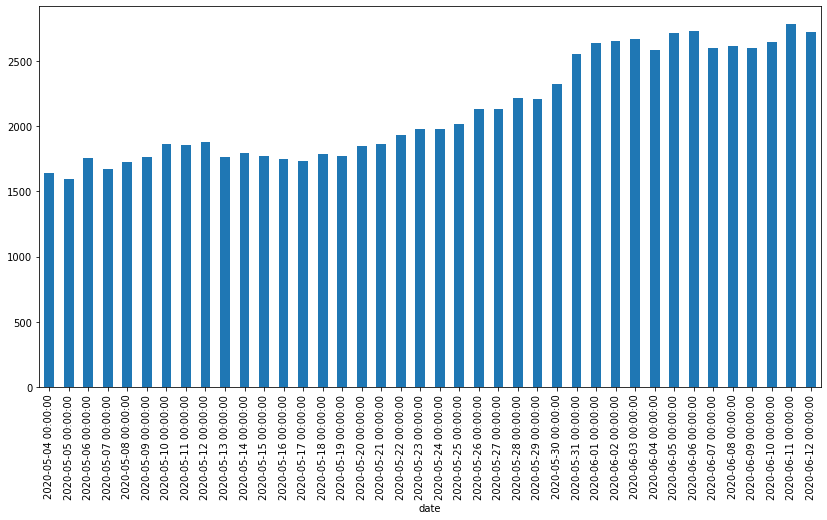

In [37]:

graph1 = dfCAAvg[-40:].positiveIncrease.plot.bar(figsize=(14,7))


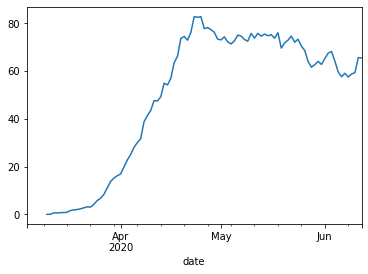

In [38]:
dfCAAvg.deathIncrease.plot.line()

In [39]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['GA']))].head(10)

,state,date,positive,death,total_positive,pct
1085,GA,2020-06-12,55783,2418,55783,1.000000
1086,GA,2020-06-11,54973,2375,55783,0.985479
1087,GA,2020-06-10,53980,2329,55783,0.967678
1088,GA,2020-06-09,53249,2285,55783,0.954574
1089,GA,2020-06-08,52497,2208,55783,0.941093
1090,GA,2020-06-07,51898,2180,55783,0.930355
1091,GA,2020-06-06,51309,2174,55783,0.919796
1092,GA,2020-06-05,50621,2174,55783,0.907463
1093,GA,2020-06-04,49847,2147,55783,0.893588
1094,GA,2020-06-03,48894,2123,55783,0.876504


In [40]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .85)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
392,AZ,2020-06-05,24332,1012,32918,0.739170
204,AR,2020-06-05,8651,152,11547,0.749199
4341,SC,2020-06-05,13453,538,17170,0.783518
2950,NC,2020-06-05,33255,966,41249,0.806201
106,AL,2020-06-05,19387,676,23710,0.817672
4741,UT,2020-06-05,11252,120,13577,0.828755
4148,PR,2020-06-05,4620,141,5536,0.834538
7,AK,2020-06-05,524,10,625,0.838400
3948,OR,2020-06-05,4570,161,5377,0.849916


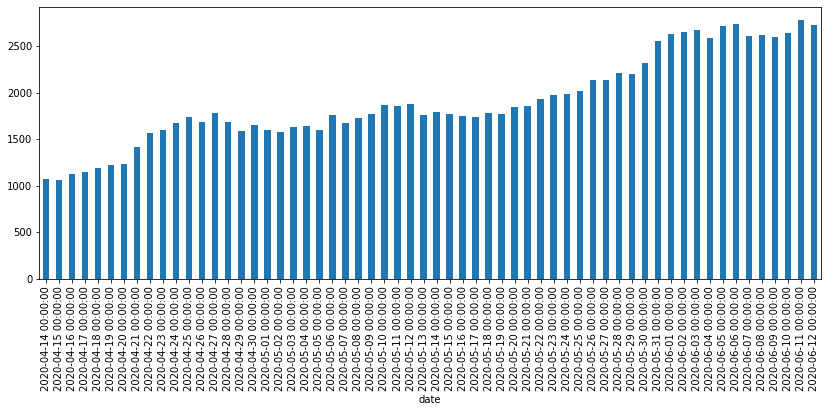

In [41]:

def showStateData(state):
  return dfCovidtracking[dfCovidtracking.state==state]\
  .sort_index()\
  .copy()



chart = showStateData('CA')\
.positiveIncrease\
.rolling(window=7)\
.mean()[-60:].plot.bar(figsize=(14,5))

In [42]:
dfTest = dfCovidtracking[dfCovidtracking.state=='CA'].sort_index().copy()
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,0,0,515,515,0,515,0,0,da5ffc320e330912eb2bda98d99788210f19d9b0,0,0,0,0,0,
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,0,0,515,515,0,515,0,0,9c56c71986f12d235538a29d11cd0f6b74c3fb62,0,0,0,0,0,
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,7,0,522,522,7,522,0,0,c4cb1d3cb8adf346e3e2fa0f88700667f007f331,0,0,0,0,0,
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,9,0,531,531,9,531,0,0,ab0f7583b4a081f1c7f18137c08161c4f4a5806e,0,0,0,0,0,
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,19,0,550,550,19,550,0,0,2f228f815b4535561a1b436cdd02c14547645345,0,0,0,0,0,


In [43]:
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,0,0,515,515,0,515,0,0,da5ffc320e330912eb2bda98d99788210f19d9b0,0,0,0,0,0,
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,0,0,515,515,0,515,0,0,9c56c71986f12d235538a29d11cd0f6b74c3fb62,0,0,0,0,0,
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,7,0,522,522,7,522,0,0,c4cb1d3cb8adf346e3e2fa0f88700667f007f331,0,0,0,0,0,
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,9,0,531,531,9,531,0,0,ab0f7583b4a081f1c7f18137c08161c4f4a5806e,0,0,0,0,0,
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,06,19,0,550,550,19,550,0,0,2f228f815b4535561a1b436cdd02c14547645345,0,0,0,0,0,


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [46]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.index.max()][['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     2037530
negative    20479732
pending         1783
death         108554
total       22519045
dtype: int64
Current Infection Rate 9.048030%
Percentage of US affected: 0.653816%
Observed CFR: 5.327725%
Percentage of US tested/affected: 6.893081%
Projected affected by cir = 29,699,212
Projected killed = 1,582,293


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.index.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [54]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).\
             T.sort_values(by="state_pos_pop", ascending=False)[:50]

,state_pos_pop,state_test_pop
state,,
NY,1.962181,14.400448
NJ,1.870755,11.882160
MA,1.524250,10.059611
RI,1.505341,18.078634
DC,1.367908,8.778333
CT,1.253447,9.263041
DE,1.044709,7.978730
IL,1.042147,9.059172
MD,1.002584,6.617866


In [55]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 6.860009%


In [56]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

# OWID Data

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [60]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    22418881.0
RUS    14218674.0
IND     5213140.0
ITA     4443821.0
DEU     4348880.0
          ...    
PRY       41702.0
BOL       39610.0
MDV       31355.0
ZWE       22805.0
CRI       22741.0
Name: total_tests, Length: 84, dtype: float64

In [61]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 66438730
Total tests done in USA : 22418881
How many more times has the world tested more than the US: 3.0


In [62]:
dfOwidLatest[isUSA].sum()

continent                            North America
location                             United States
date                                    2020-06-11
total_cases                            2.00046e+06
new_cases                                    20614
total_deaths                                112924
new_deaths                                     918
total_cases_per_million                    6043.65
new_cases_per_million                       62.277
total_deaths_per_million                   341.157
new_deaths_per_million                       2.773
total_tests                            2.24189e+07
new_tests                                   367990
total_tests_per_thousand                     67.73
new_tests_per_thousand                       1.112
new_tests_smoothed                          372520
new_tests_smoothed_per_thousand              1.125
tests_units                        tests performed
stringency_index                             72.69
population                     

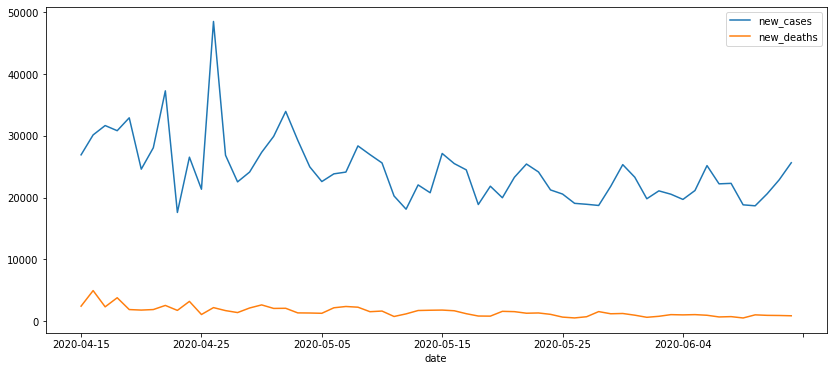

In [63]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-60:].plot.line(figsize=(14,6))

In [0]:
state = 'TX'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state]\
.rolling(window=7).mean()


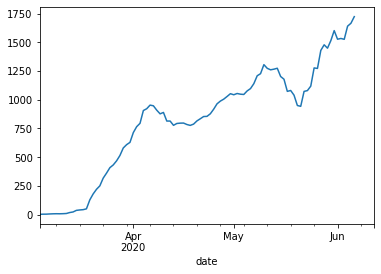

In [65]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [66]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

69069

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'][['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [68]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,346,1137,85445,6414,91859
1,543,1849,73088,8870,81958
2,415,1953,1832,9366,11198
3,395,1367,76270,8411,84681
4,379,1421,98849,9782,108631
5,203,1111,95506,6654,102160
6,137,343,105185,6284,111469


# Socrata (San Francisco) Data

In [69]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [0]:
res = results_df.astype({'case_count':'int16'}).rename(columns={'specimen_collection_date':'date'})


In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [0]:
dfTotals = dfresConf.groupby(by='date').sum().join(dfresDead.groupby(by='date').sum(), \
        rsuffix='dead').fillna(0) \
        .rename(columns={'case_count':'positive', 'case_countdead':'dead'})

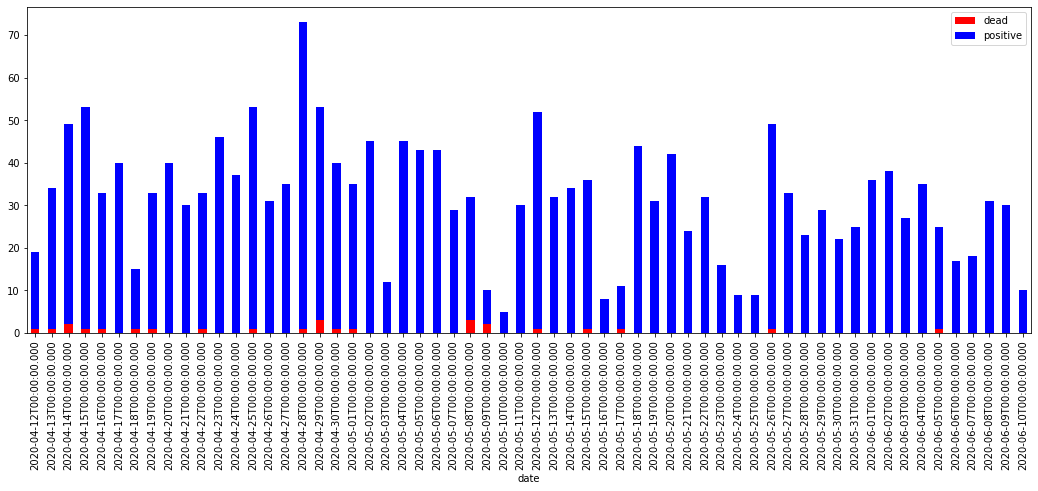

In [75]:
chart = dfTotals[['dead', 'positive']][-60:]\
.plot.bar(figsize=(18,6),stacked=True, color=['red','blue'])

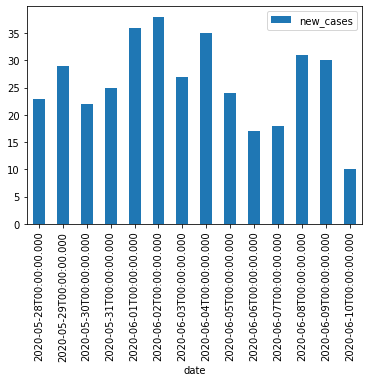

In [76]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail(14).plot.bar()

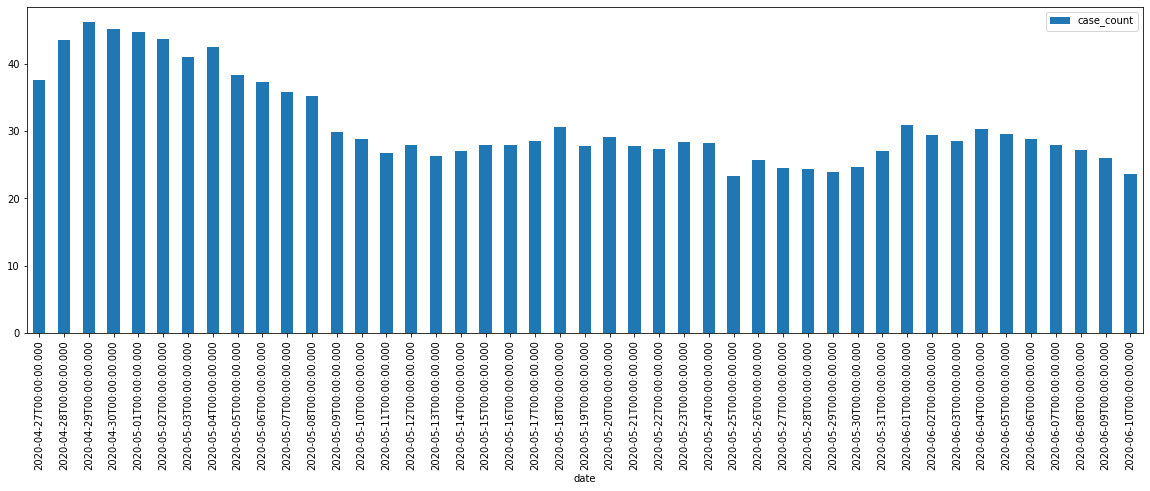

In [77]:
dfresConf.groupby('date').sum().rolling(window=7).mean()[-45:].plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [79]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-06-08,610,17.0,16040.0,52.0,409.0
2020-06-09,620,17.0,16548.0,52.0,427.0
2020-06-10,635,17.0,17032.0,52.0,434.0
2020-06-11,648,17.0,17367.0,49.0,463.0
2020-06-12,676,17.0,17425.0,51.0,487.0


In [80]:
df[['deaths','positive']].diff()

,deaths,positive
date,,
2020-03-06,NaN,NaN
2020-03-07,0.0,0.0
2020-03-08,0.0,1.0
2020-03-09,0.0,0.0
2020-03-10,NaN,0.0
...,...,...
2020-06-08,0.0,21.0
2020-06-09,0.0,10.0
2020-06-10,0.0,15.0


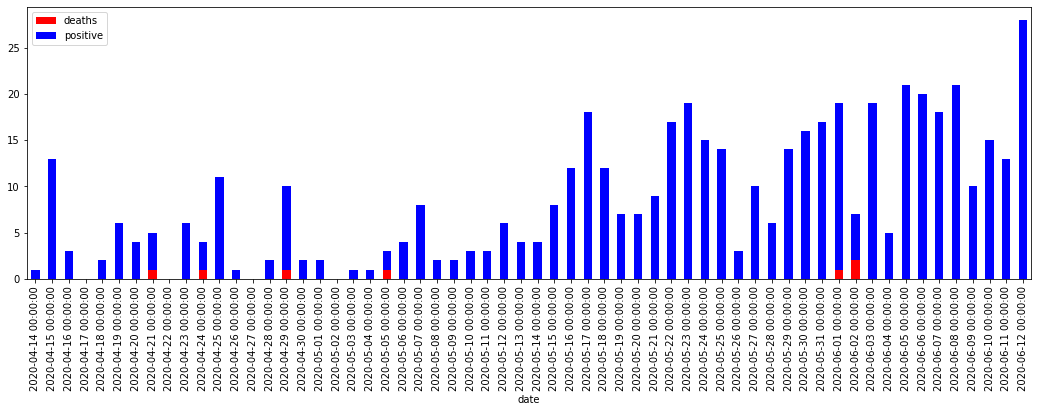

In [81]:
chart= df[['deaths','positive']].diff()[-60:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

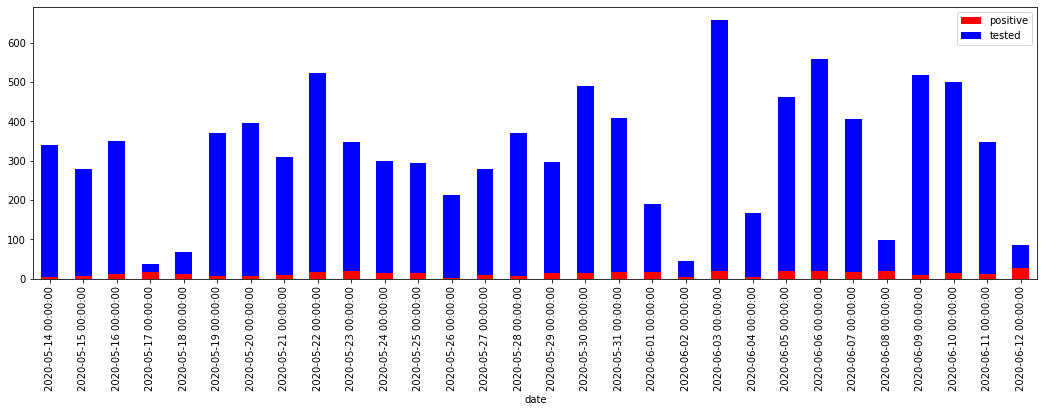

In [82]:
chart= df[['positive','tested']].diff()[-30:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

In [83]:
(df.positive.diff()/df.tested.diff()).rolling(window=7).mean()[-14:]

date
2020-05-30    0.036288
2020-05-31    0.034923
2020-06-01    0.042644
2020-06-02    0.058908
2020-06-03    0.057825
2020-06-04    0.059880
2020-06-05    0.059625
2020-06-06    0.060103
2020-06-07    0.060534
2020-06-08    0.084132
2020-06-09    0.068629
2020-06-10    0.068809
2020-06-11    0.069943
2020-06-12    0.132121
dtype: float64

In [84]:
df.positive.diff()[-1]/df.tested.diff()[-1]

0.4827586206896552

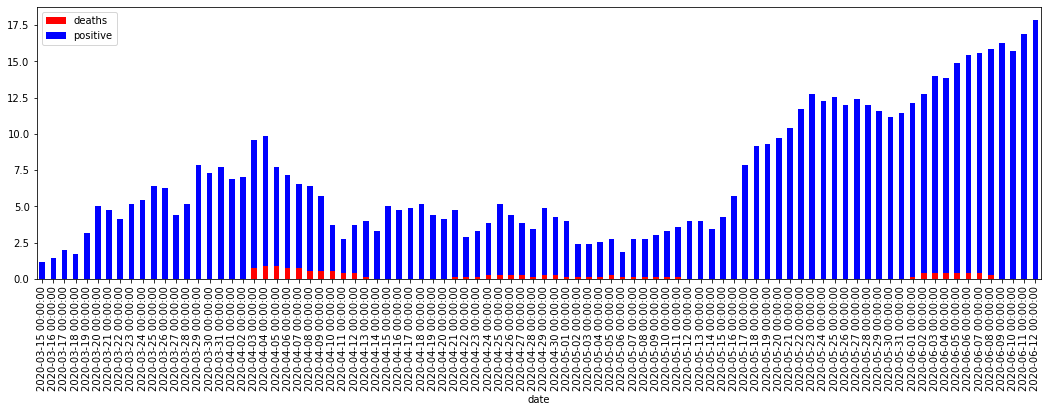

In [85]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

In [86]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.26%
Marin Population Tested: 6.71%


In [87]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-06-08    15.571429
2020-06-09    16.285714
2020-06-10    15.714286
2020-06-11    16.857143
2020-06-12    17.857143
Name: positive, dtype: float64

In [88]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(28)[::-1].positive.diff()


date
2020-05-16       NaN
2020-05-17    2046.0
2020-05-18    1591.0
2020-05-19    1365.0
2020-05-20    2262.0
2020-05-21    2140.0
2020-05-22    2247.0
2020-05-23    2187.0
2020-05-24    2079.0
2020-05-25    1848.0
2020-05-26    2175.0
2020-05-27    2247.0
2020-05-28    2717.0
2020-05-29    2189.0
2020-05-30    2992.0
2020-05-31    3705.0
2020-06-01    2423.0
2020-06-02    2304.0
2020-06-03    2377.0
2020-06-04    2120.0
2020-06-05    3094.0
2020-06-06    3115.0
2020-06-07    2796.0
2020-06-08    2507.0
2020-06-09    2170.0
2020-06-10    2702.0
2020-06-11    3090.0
2020-06-12    2702.0
Name: positive, dtype: float64